Epoch 1/10
19/19 [==============================] - 1s 16ms/step - loss: 0.1094 - val_loss: 0.0618
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 0.0389 - val_loss: 0.0178
Epoch 3/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0165 - val_loss: 0.0109
Epoch 4/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0082 - val_loss: 0.0073
Epoch 5/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0053 - val_loss: 0.0055
Epoch 6/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0045 - val_loss: 0.0052
Epoch 7/10
19/19 [==============================] - 0s 8ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 8/10
19/19 [==============================] - 0s 9ms/step - loss: 0.0039 - val_loss: 0.0046
Epoch 9/10
19/19 [==============================] - 0s 7ms/step - loss: 0.0041 - val_loss: 0.0051
Epoch 10/10
2/2 [==============================] - 0s 5ms/step


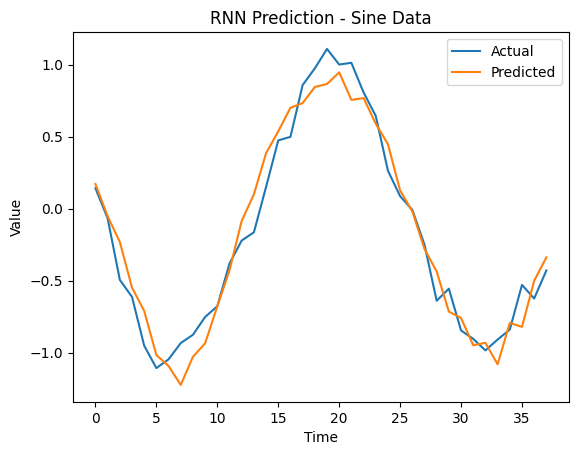

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

# === Select the task here ===
task = 'sine'     # Options: 'sine', 'car', 'stock'

# === Load data based on task ===
if task == 'sine':
    x = np.linspace(0, 50, 200)
    data = np.sin(x) + np.random.normal(0, 0.1, 200)
elif task == 'car':
    df = pd.read_csv('car_sales.csv')  # replace filename if needed
    data = df['Sales'].dropna().values
elif task == 'stock':
    df = pd.read_csv('stock_prices.csv')  # replace filename if needed
    data = df['Close'].dropna().values

# === Preprocessing ===
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

X, y = [], []
seq_length = 10
for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i:i+seq_length])
    y.append(data_scaled[i+seq_length])
X, y = np.array(X), np.array(y)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# === Build RNN model ===
model = Sequential([
    SimpleRNN(20, input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# === Train model ===
model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

# === Predict and plot ===
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'RNN Prediction - {task.capitalize()} Data')
plt.legend()
plt.show()